In [1]:
# Libraries used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV
from math import sqrt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Upload the file 
Mdata = pd.read_csv('cleaned_earthquake_data.csv')

In [3]:
# Convert 'DateTime' column to datetime dtype
Mdata['DateTime'] = pd.to_datetime(Mdata['DateTime'])
# Filtering the data to include only years up to 2023
Mdata = Mdata[Mdata['DateTime'].dt.year <= 2023]
# Filtering out records with negative magnitudes
Mdata = Mdata[Mdata['mag'] >= 0]
# Filtering the data for valid longitude and latitude values
Mdata = Mdata[(Mdata['longitude'].between(-180, 180)) & (Mdata['latitude'].between(-90, 90))]
# Filtering out outliers in depth (removing values greater than 2000)
Mdata = Mdata[Mdata['depth'] <= 2000]

In [4]:
# Preparing the dataset for machine learning
df_ml = Mdata.copy()

In [5]:
# Selecting features and target variable
features = ['latitude', 'longitude', 'depth', 'year', 'month', 'day', 'hour', 'minute', 'second']
target_rf = 'mag'

In [6]:
# Splitting the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_ml[features], df_ml[target_rf], test_size=0.2, random_state=42)

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

In [8]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train_rf, y_train_rf)
rf_predictions = rf.predict(X_test_rf)

In [9]:
# Evaluating the models
rf_rmse = sqrt(mean_squared_error(y_test_rf, rf_predictions))
print(rf_rmse)

0.7155083213619473


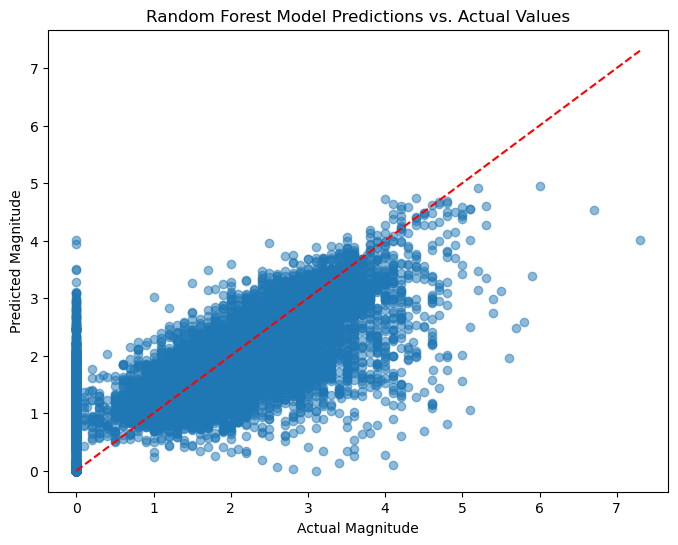

In [10]:
#Plot Random forest results 
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rf, rf_predictions, alpha=0.5)
plt.plot([min(y_test_rf), max(y_test_rf)], [min(y_test_rf), max(y_test_rf)], 'r--')
plt.title('Random Forest Model Predictions vs. Actual Values')
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.show()

In [11]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_rf, y_train_rf)

best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_

In [12]:
print(best_rf_params)
print(-best_rf_score)

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
0.511455763044516
